# Домашнее задание 4.1

# 🥨👨🏻‍🍳🥐🥖

Тест с картинками оказался в итоге успешным, и теперь мы хотим усилить визуальный контент. Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста 

## Задание 1. Выбери окно конверсии, используя исторические данные 

**1. Прочитай файл investigate_window.csv.**
   - Запиши даннные в переменную `historical_data`
    
   - Отправь безымянную колонку с нумерацией в индекс с помощью аргумента функции `read_csv()`.
   
   - Проверь, какой тип данных в каждой колонке, и переведи столбцы с датами в формат даты. 

In [1]:
import pandas as pd

In [2]:
import pandas as pd

In [3]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это. 

historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**
   - Импортируй библиотеку `NumPy` и используй функцию перцентиля из нее.
   - Какой перцентиль соответствует недельному окну конверсии? 
   - Запиши это значение в отдельную переменную `perc_X`, где Х — это выбранный тобой процент, а значение переменной – значение перцентиля, т. е. количество дней, которое избирается в качестве окна конверсии. 
   - Округли значение до 1 знака после запятой.

In [5]:
import numpy as np

In [6]:
# Недельному окну конверсии соответствует 95-ый перцентиль

perc_95 = round(np.percentile(historical_data['time_to_order'], 95),1)
print(f'95-ый перцентиль – {perc_95} дней')

95-ый перцентиль – 7.1 дней


In [7]:
np.percentile(historical_data['time_to_order'], 90)

2.864949845679016

In [8]:
np.percentile(historical_data['time_to_order'], 85)

1.9903886959876524

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 
   - Передай функции графика в аргумент данные о времени конверсии
   - Назови график и оси
   - Вертикальной пунктирной линией отметь значение выбранного тобой перцентиля. 
   - Выведи значение перцентиля в легенду. 
*Можешь использовать `seaborn` или `matplotlib`, как тебе удобнее.*

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

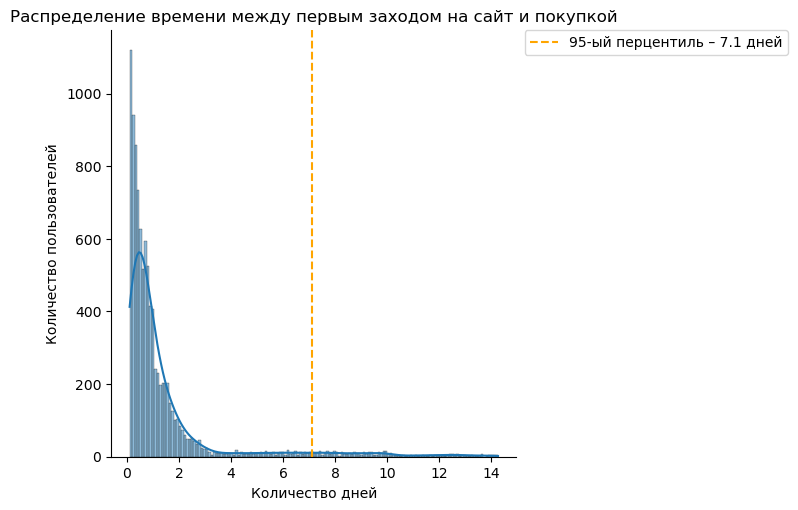

In [10]:
sns.displot(historical_data['time_to_order'], kde=True)
plt.axvline(perc_95,
           linestyle= '--', 
           color = 'orange', 
           label = f'95-ый перцентиль – {perc_95} дней')
plt.title('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`. 
   - Назначь индекс аналогично первому заданию.

In [11]:
data = pd.read_csv('bakery_ab_test.csv', index_col = 0 )

In [12]:
data.head(20)

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
6,3823,test,455.185867,regions,social_media,1,pc
7,3840,control,4912.507690,spb,social_media,1,pc
8,3857,test,NaN,msk,target_direct,0,pc
9,3874,test,NaN,regions,context_brand,0,pc
10,3891,test,308.473878,msk,target_direct,1,pc


**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [13]:
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum'})
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics

,test_group,user_id,within_window,conversion
0,control,75210,22998,30.58
1,test,75273,24427,32.45


In [14]:
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor,
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4, 
                    aspect = 1.5) 

**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

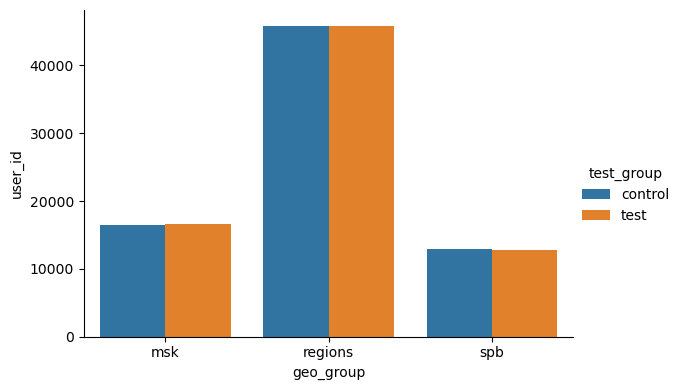

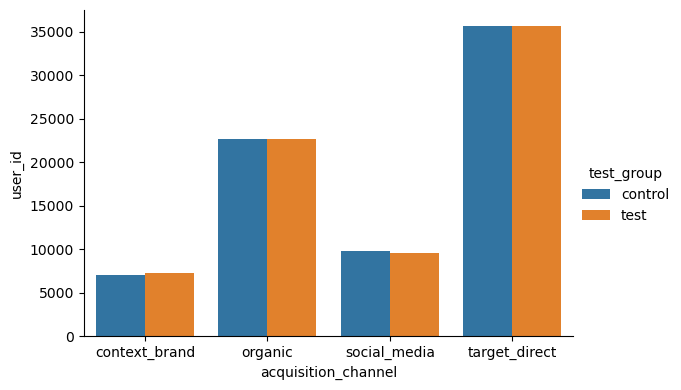

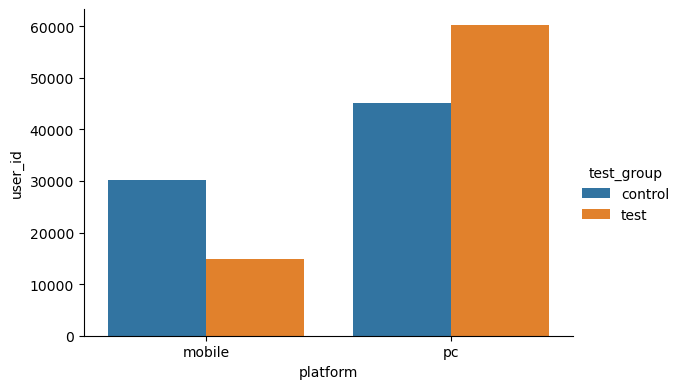

In [15]:
plot_segments_distribution(data, 
                           ["geo_group", "acquisition_channel","platform"],
                           "test_group")

In [16]:
# ВЫВОД: Распредление пользователей в тестовой и контрольной группах смещено по платформам.

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)
    
*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [17]:
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount': 'mean'})
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864335,30.58
1,test,75273,24427,5394.771589,32.45


In [18]:
data_pc = data.loc[data['platform'] == 'pc']
metrics_pc = data_pc.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount': 'mean'})
metrics_pc['conversion'] = round(metrics_pc['within_window']/metrics_pc['user_id']*100, 2)
metrics_pc

,test_group,user_id,within_window,purchase_amount,conversion
0,control,45112,13732,5200.121803,30.44
1,test,60317,19659,5401.003720,32.59


In [19]:
data_mobile = data.loc[data['platform'] == 'mobile']
metrics_mobile = data_mobile.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount': 'mean'})
metrics_mobile['conversion'] = round(metrics_mobile['within_window']/metrics_mobile['user_id']*100, 2)
metrics_mobile

,test_group,user_id,within_window,purchase_amount,conversion
0,control,30098,9266,5127.505438,30.79
1,test,14956,4768,5369.075812,31.88


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [20]:
import statsmodels.stats.proportion as proportion

In [25]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['within_window'], metrics['user_id'])
print('chi2stat -', chi2stat)
print('pval -', pval)
#print('table -', table)

chi2stat - 61.137841436908104
pval - 5.321539863368111e-15


In [23]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])
print('chi2stat_pc -', chi2stat_pc)
print('pval_pc -', pval_pc)
#print('table_pc -', table_pc)

chi2stat_pc - 55.28301795095328
pval_pc - 1.0436637877855105e-13


In [24]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])
print('chi2stat_mobile -', chi2stat_mobile)
print('pval_mobile -', pval_mobile)
#print('table_mobile -', table_mobile)

chi2stat_mobile - 5.576527147023639
pval_mobile - 0.018202784051985058


**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [26]:
alpha = 0.05

print(pval > alpha)
print(pval_pc > alpha)
print(pval_mobile > alpha)

False
False
False


**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

In [27]:
# Нулевая гипотеза о равенстве конверсий в тестовой и контрольной группах отвергается в связи с низким p-value, 
# статистически значимая разница присутствует в каждой группе 

## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower` 
3. Реализуй функцию для подсчета `effect_size`

In [28]:
import statsmodels.stats.power as smp

In [29]:
chipower = smp.GofChisquarePower()

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [30]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %
    
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [32]:
conversion_control = metrics['conversion'].values[0]/100 
print('conversion_control', conversion_control)

conversion_test = conversion_test = metrics['conversion'].values[1]/100
print('conversion_test', conversion_test)

nobs = min(metrics['user_id'])
print('nobs', nobs)

conversion_control 0.30579999999999996
conversion_test 0.3245
nobs 75210


In [33]:
conversion_control_mobile = metrics_mobile['conversion'].values[0]/100 
print('conversion_control_mobile', conversion_control_mobile)

conversion_test_mobile = metrics_mobile['conversion'].values[1]/100 
print('conversion_test_mobile', conversion_test_mobile)

nobs_mobile = min(metrics_mobile['user_id'])
print('nobs_mobile', nobs_mobile)

conversion_control_mobile 0.3079
conversion_test_mobile 0.3188
nobs_mobile 14956


In [34]:
conversion_control_pc = metrics_pc['conversion'].values[0]/100 
print('conversion_control_pc', conversion_control_pc)

conversion_test_pc = metrics_pc['conversion'].values[1]/100
print('conversion_test_pc', conversion_test_pc)

nobs_pc = min(metrics_pc['user_id'])
print('nobs_pc', nobs_pc)

conversion_control_pc 0.3044
conversion_test_pc 0.3259
nobs_pc 45112


**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [35]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test), 
                                               nobs = nobs, 
                                               alpha = pval, 
                                               power = None) 
print('Общая мощность эксперимента', power)

Общая мощность эксперимента 0.927136791608663


In [36]:
mobile_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), 
                                               nobs = nobs_mobile, 
                                               alpha = pval_mobile, 
                                               power = None)
print('Мощность эксперимента для платформы "mobile"', mobile_power)

Мощность эксперимента для платформы "mobile" 0.51629109023244


In [37]:
pc_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), 
                                               nobs= nobs_pc, 
                                               alpha = pval_pc, 
                                               power = None)
print('Мощность эксперимента для платформы "pc"', pc_power)

Мощность эксперимента для платформы "pc" 0.7999771197445285


In [38]:
# Общая мощность эксперимента и Мощность эксперимента для платформы "pc" достаточные (> 80%), Мощность эксперимента для платформы 
#"mobile" - низкая(<80%), получается, что делать выводы мы можем только по сегменту - для платформы "pc", а для остальных  - 
# набрать нужное количество наблюдений/не учитывать результаты.

## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [39]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [53]:
test = data[data['test_group'] == 'test']['purchase_amount'].dropna().values
control = data[data['test_group'] == 'control']['purchase_amount'].dropna().values

test_pc = data_pc[data_pc['test_group'] == 'test']['purchase_amount'].dropna().values
control_pc = data_pc[data_pc['test_group'] == 'control']['purchase_amount'].dropna().values

test_mobile = data_mobile[data_mobile['test_group'] == 'test']['purchase_amount'].dropna().values
control_mobile = data_mobile[data_mobile['test_group'] == 'control']['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [55]:
boot = bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
print(boot)

[219.73516555 183.52831825 220.99306871 ... 174.60997576 331.62517673
 326.9321319 ]


In [56]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
print(boot_pc)

[249.3795079  282.46548055 213.81072412 ... 237.57400518 296.41625674
 226.41552467]


In [57]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
print(boot_mobile)

[367.99269152 147.79003491 364.36960839 ...  78.46723129 380.51389196
 330.7582319 ]


**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [58]:
borders = np.percentile(boot,[2.5, 97.5])
borders_pc = np.percentile(boot_pc,[2.5, 97.5])
borders_mobile = np.percentile(boot_mobile,[2.5, 97.5])

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.
   

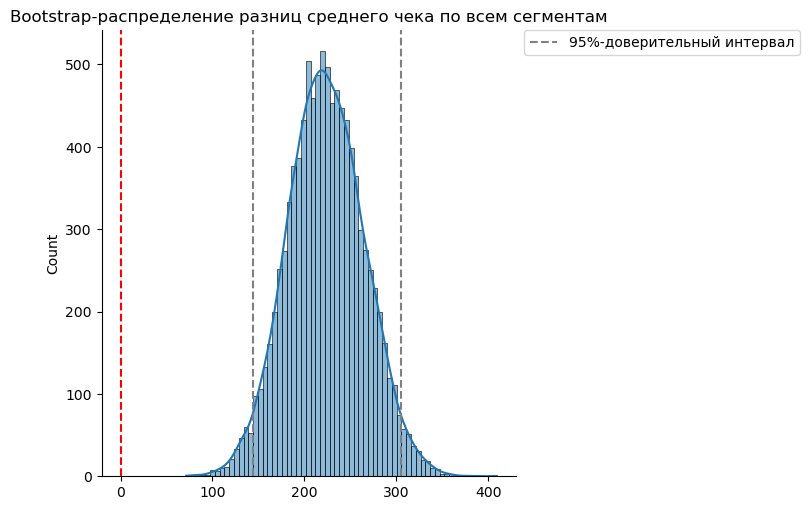

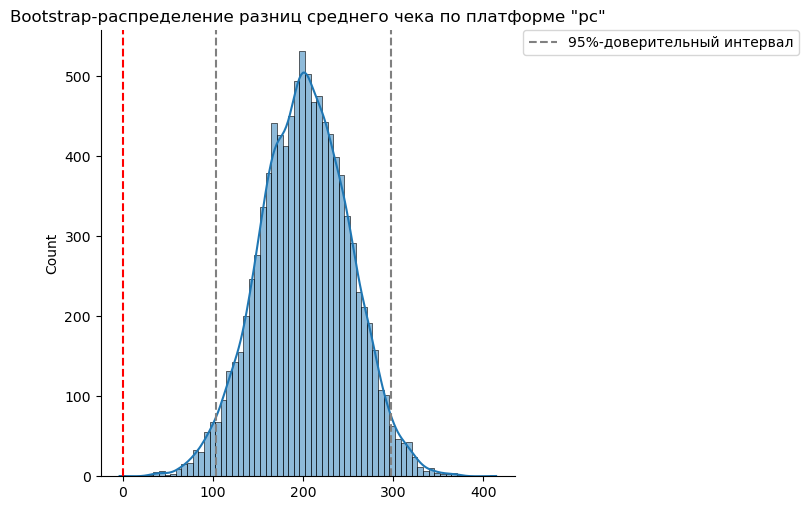

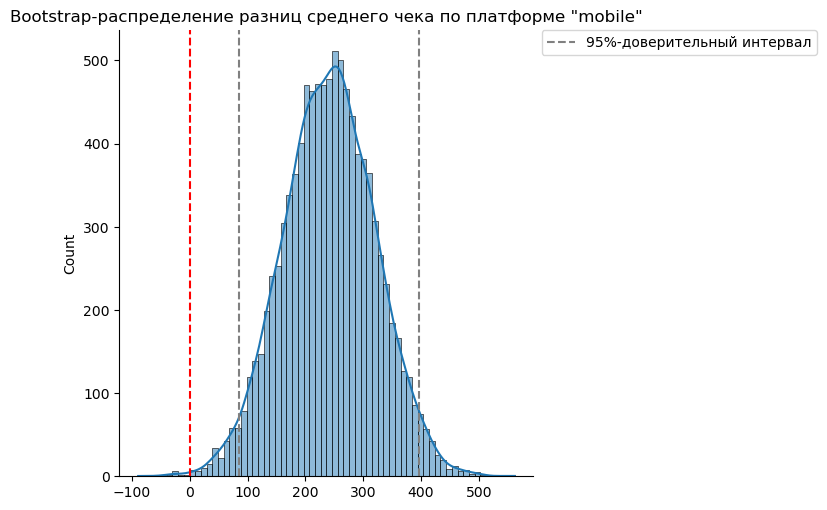

In [61]:
sns.displot(boot,kde=True, alpha=0.5) 
plt.title('Bootstrap-распределение разниц среднего чека по всем сегментам')
plt.axvline(0, 
           linestyle= '--', 
           color = 'red')
plt.axvline(borders[0], 
           linestyle= '--', 
           color = 'grey', 
           label = '95%-доверительный интервал')
plt.axvline(borders[1], 
           linestyle= '--', 
           color = 'grey') 
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)


sns.displot(boot_pc,kde=True, alpha=0.5) 
plt.title('Bootstrap-распределение разниц среднего чека по платформе "pc"')
plt.axvline(0, 
           linestyle= '--', 
           color = 'red')
plt.axvline(borders_pc[0], 
           linestyle= '--', 
           color = 'grey', 
           label = '95%-доверительный интервал')
plt.axvline(borders_pc[1], 
           linestyle= '--', 
           color = 'grey') 
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)


sns.displot(boot_mobile,kde=True, alpha=0.5) 
plt.title('Bootstrap-распределение разниц среднего чека по платформе "mobile"')
plt.axvline(0, 
           linestyle= '--', 
           color = 'red')
plt.axvline(borders_mobile[0], 
           linestyle= '--', 
           color = 'grey', 
           label = '95%-доверительный интервал')
plt.axvline(borders_mobile[1], 
           linestyle= '--', 
           color = 'grey') 
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)

plt.show()

In [ ]:
# Статистически значимая разница в среднем чеке есть вцелом и отделно по сегментам, так как не 0 входит в доверительный 
# интервал разницы между контрольной и тестовой групп

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

In [ ]:
# Гипотеза о том, что добавление видео с процессом приготовления вкусностей мотивирует пользователей к их покупке 
# подтверждается - мы наблюдаем оба эффекта, которых хотели добиться:
#                        - повысилась конверсия из визита в оплату (больше людей купили нашу продукцию)
#                        - отмечатеся увеличение среднего чека покупки.
# Экперимент можно считать успешным, а соответственно и внедрять изменение каталога.

# 🎉🎉🎉 Поздравляем, ты великолепен! 